<a href="https://colab.research.google.com/github/Edelmackey/Data-science-portfolio-by-Raphael-Lacoste/blob/master/Fintech_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
    # Pour lire les données de Yahoo Finance, vous devez installer le toolbox yfinance
import yfinance as yf

start_sp = datetime.datetime(2004,12,31)
end_sp = datetime.datetime(2019, 12,31)
dow30 = ['^DJI','AXP', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'DD', 'XOM',
         'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM',
         'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG',
         'TRV', 'UNH', 'UTX', 'VZ', 'V', 'WMT', 'DIS']

Dow_data = yf.download(dow30, start=start_sp, end=end_sp,group_by="ticker")

    # To access the adjusted close price, use
data = Dow_data['^DJI']['Close']

[*********************100%***********************]  31 of 31 completed


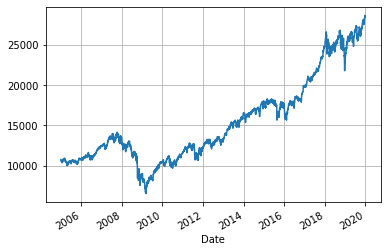

In [ ]:
Dow_data['^DJI']['Close'].plot(grid=True)

In [50]:
    #Q1.I.a.	Calculer les rendements quotidiens en prenant le prix de base ajusté pour les dividendes (Adj Close des 30 titres)
df = pd.DataFrame(Dow_data[dow30]) #Met le data en dataframe
df = df.iloc[:,df.columns.get_level_values(1)=='Adj Close'] #Va chercher chaque Adj Close des titres
df2_dow = df.iloc[:,0:31]
print(df2_dow)    

                    ^DJI         AXP  ...         WMT         DIS
               Adj Close   Adj Close  ...   Adj Close   Adj Close
Date                                  ...                        
2004-12-31  10783.009766   38.640141  ...   37.188171   22.565386
2005-01-03  10729.429688   38.324841  ...   37.561329   22.605978
2005-01-04  10630.780273   37.749012  ...   37.469795   22.362459
2005-01-05  10597.830078   37.410301  ...   37.519077   22.240704
2005-01-06  10622.879883   37.217903  ...   38.054157   22.273172
...                  ...         ...  ...         ...         ...
2019-12-23  28551.529297  122.817421  ...  117.503563  144.679993
2019-12-24  28515.449219  123.064056  ...  117.977409  145.289993
2019-12-26  28621.390625  123.725060  ...  117.987274  145.699997
2019-12-27  28645.259766  123.508018  ...  118.056381  145.750000
2019-12-30  28462.140625  122.629967  ...  117.868820  143.770004

[3776 rows x 31 columns]


In [51]:
        #Q1.I.b.	Rendement périodique moyen
periode = 1
daily_df2_dow = df2_dow.pct_change(periode, fill_method = 'ffill')
DJI = daily_df2_dow['^DJI']
daily_df2_dow = daily_df2_dow.drop(['^DJI'], axis = 1)
daily_df2_dow_avg = daily_df2_dow.mean(axis=0)
print(daily_df2_dow_avg)

AXP   Adj Close    0.000537
AAPL  Adj Close    0.001344
BA    Adj Close    0.000735
CAT   Adj Close    0.000600
CSCO  Adj Close    0.000462
CVX   Adj Close    0.000489
DD    Adj Close    0.000309
XOM   Adj Close    0.000301
GE    Adj Close    0.000016
GS    Adj Close    0.000506
HD    Adj Close    0.000652
IBM   Adj Close    0.000272
INTC  Adj Close    0.000519
JNJ   Adj Close    0.000385
KO    Adj Close    0.000494
JPM   Adj Close    0.000719
MCD   Adj Close    0.000668
MMM   Adj Close    0.000397
MRK   Adj Close    0.000545
MSFT  Adj Close    0.000688
NKE   Adj Close    0.000915
PFE   Adj Close    0.000349
PG    Adj Close    0.000387
TRV   Adj Close    0.000579
UNH   Adj Close    0.000734
UTX   Adj Close    0.000474
VZ    Adj Close    0.000416
V     Adj Close    0.001120
WMT   Adj Close    0.000378
DIS   Adj Close    0.000617
dtype: float64


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [ ]:
    #Q1.I.c.	Écart-type des rendements
daily_df2_dow_std = daily_df2_dow.std(axis = 0)
print(daily_df2_dow_std)

AXP   Adj Close    0.021539
AAPL  Adj Close    0.020344
BA    Adj Close    0.017437
CAT   Adj Close    0.019704
CSCO  Adj Close    0.017739
CVX   Adj Close    0.016119
DD    Adj Close    0.021418
XOM   Adj Close    0.014771
GE    Adj Close    0.019215
GS    Adj Close    0.022364
HD    Adj Close    0.015793
IBM   Adj Close    0.013459
INTC  Adj Close    0.017826
JNJ   Adj Close    0.010167
KO    Adj Close    0.010845
JPM   Adj Close    0.023674
MCD   Adj Close    0.011860
MMM   Adj Close    0.013570
MRK   Adj Close    0.015460
MSFT  Adj Close    0.016325
NKE   Adj Close    0.016733
PFE   Adj Close    0.013642
PG    Adj Close    0.010695
TRV   Adj Close    0.016587
UNH   Adj Close    0.019562
UTX   Adj Close    0.014243
VZ    Adj Close    0.012795
V     Adj Close    0.018413
WMT   Adj Close    0.012080
DIS   Adj Close    0.015917
dtype: float64


In [ ]:
    #Q1.I.d.	Matrice des corrélations
matrice_corr = daily_df2_dow.corr()
print(matrice_corr)

matrice_cov = daily_df2_dow.cov()
print(matrice_cov)

                     AXP      AAPL        BA  ...         V       WMT       DIS
               Adj Close Adj Close Adj Close  ... Adj Close Adj Close Adj Close
AXP  Adj Close  1.000000  0.415205  0.502481  ...  0.569826  0.355557  0.583959
AAPL Adj Close  0.415205  1.000000  0.377125  ...  0.458456  0.278266  0.407478
BA   Adj Close  0.502481  0.377125  1.000000  ...  0.436701  0.344513  0.525648
CAT  Adj Close  0.563383  0.427403  0.544923  ...  0.472870  0.329899  0.537869
CSCO Adj Close  0.510534  0.453586  0.459752  ...  0.478117  0.373215  0.536021
CVX  Adj Close  0.505825  0.386444  0.495864  ...  0.458931  0.347203  0.540474
DD   Adj Close  0.532556  0.377558  0.505219  ...  0.453194  0.333722  0.536753
XOM  Adj Close  0.487858  0.377961  0.503387  ...  0.439764  0.376611  0.539792
GE   Adj Close  0.557967  0.377436  0.454535  ...  0.404874  0.312592  0.501647
GS   Adj Close  0.650213  0.417558  0.470107  ...  0.518218  0.333951  0.537712
HD   Adj Close  0.562260  0.401396  0.46

In [ ]:
    #Q1.II.a et b.	Portefeuille à variance minimale
import numpy as np
from scipy.optimize import minimize
#daily_df2_dow = daily return
poids_0 = np.full((daily_df2_dow.shape[1],1), 1/daily_df2_dow.shape[1])
volatilite = np.sqrt(np.dot(poids_0.T, np.dot(matrice_cov, poids_0)))

    def variance_portefeuille(w,cov):
        return np.sqrt(np.dot(w.T, np.dot(cov, w)))

from scipy.optimize import Bounds

contraintes = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
bounds =[(0,None) for x in range(daily_df2_dow.shape[1])]

res = minimize(variance_portefeuille, poids_0, args = matrice_cov, constraints=contraintes, bounds= bounds)
poids_0 = res.x
mu_0 = poids_0*daily_df2_dow_avg
var_0 = np.sqrt(np.dot(poids_0.T, np.dot(matrice_cov, poids_0)))

print("Portefeuille sans contraintes")
print("volatilité =", volatilite)
print("Somme des poids = ", np.sum(poids_0).round(5))
print("Rendement du portefeuille =", np.sum(mu_0).round(5))
print("Variance du portefeuille =", var_0.round(5))

Portefeuille sans contraintes
volatilité = [[0.01130734]]
Somme des poids =  1.0
Rendement du portefeuille = 0.00044
Variance du portefeuille = 0.00827


In [ ]:
    #Q1.III.a et b.	Portefeuille à variance minimale avec contraintes (poids minimum = 2%, poids maximum = 20%)
contraintes = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
limites =[(0.02,0.2) for x in range(daily_df2_dow.shape[1])]

res = minimize(variance_portefeuille, poids_0, args = matrice_cov, constraints=contraintes, bounds= limites)
poids_1 = res.x
mu_1 = poids_1*daily_df2_dow_avg
var_1 = np.sqrt(np.dot(poids_1.T, np.dot(matrice_cov, poids_1)))

print("Portefeuille avec contraintes")
print("Somme des poids = ", np.sum(poids_1).round(5))
print("Rendement du portefeuille =", np.sum(mu_1).round(5))
print("Variance du portefeuille =", var_1.round(5))

Portefeuille avec contraintes
Somme des poids =  1.0
Rendement du portefeuille = 0.00051
Variance du portefeuille = 0.00968


Rendement maximal = 0.00134
90% du rendement maximal = 0.00121
Portefeuille avec contraintes
Somme des poids =  1.0
Rendement du portefeuille = 0.00121
Variance du portefeuille = 0.01571
8 rendements de portefeuilles entre le min et max =  [0.00052991 0.00061484 0.00069977 0.0007847  0.00086963 0.00095455
 0.00103948 0.00112441]


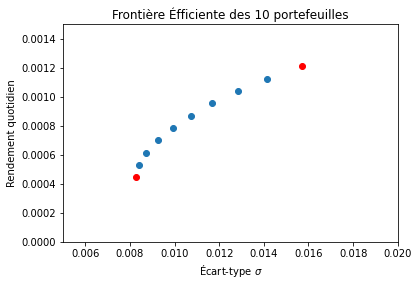

In [ ]:
    #Q1.IV.a.i et ii.	10 portefeuilles avec rendement min = portefeuille à variance minimale, rendement max = 90% rendement
rendement_max = np.max(daily_df2_dow_avg) #Portefeuille a rendement max
print("Rendement maximal =", round(rendement_max,5))

rendement_max90 = 0.9*rendement_max #Portefeuille a 90% du rendement
print("90% du rendement maximal =", round(rendement_max90,5))

contraintes = ({'type': 'eq', 'fun': lambda x: np.sum(x)-1.0}, {'type': 'eq', 'fun': lambda x: np.sum(x*daily_df2_dow_avg)-rendement_max90})
limites = [(0, None) for x in range(daily_df2_dow.shape[1])]
               
res = minimize(variance_portefeuille, poids_0, args = matrice_cov, method = 'SLSQP', constraints = contraintes, bounds = limites, options = {'maxiter':100000})
poids_2 = res.x
mu_2 = poids_2*daily_df2_dow_avg
var_2 = np.sqrt(np.dot(poids_2.T, np.dot(matrice_cov, poids_2)))

print("Portefeuille avec contraintes")
print("Somme des poids = ", np.sum(poids_2).round(5))
print("Rendement du portefeuille =", np.sum(mu_2).round(5))
print("Variance du portefeuille =", var_2.round(5))

#Identification de 8 autres portefeuilles entre le min et le max
interval = np.linspace(np.sum(mu_0), np.sum(mu_2), num = 10)
interval_2 = interval[1:-1]
print("8 rendements de portefeuilles entre le min et max = ", interval_2)

#optimisation des 8 portefeuilles
poids = []
    for i in range(0, len(interval_2)):
        contraintes = ({'type': 'eq', 'fun': lambda x: np.sum(x)-1.0}, {'type': 'eq', 'fun': lambda x: (np.sum(x*daily_df2_dow_avg))-interval_2[i]}) 
        limites = [(0,None) for x in range(daily_df2_dow.shape[1])]
        res = minimize(variance_portefeuille, poids_0, args = matrice_cov, method = 'SLSQP', constraints = contraintes, bounds = limites)
        poids.append(res.x)

rendement = []
volatilite = []
    for i in range(0, len(poids)):
        rendement.append(np.sum(poids[i]*daily_df2_dow_avg))
        volatilite.append(np.sqrt(np.dot(poids[i].T, np.dot(matrice_cov, poids[i]))))
        
ax = plt.subplot(1,1,1)
ax.scatter(volatilite, rendement)
ax.plot(var_2, np.sum(mu_2), "or")
ax.plot(var_0, np.sum(mu_0), "or")
plt.xlim(0.005, 0.02)
plt.ylim(0, 0.00150)
plt.xlabel("Écart-type $\sigma$")
plt.ylabel("Rendement quotidien")
plt.title("Frontière Éfficiente des 10 portefeuilles")
plt.show()

In [ ]:
#Q2 VAR historique sur une période de 250 jours (portefeuille équi-pondéré)

In [ ]:
equi_poids=np.full((daily_df2_dow.shape[1],1), 1/daily_df2_dow.shape[1]) #Poids équipondérés
intervalle=equi_poids.T*daily_df2_dow[-250:] #dernier 250 jours
intervalle_rendement= intervalle.sum(axis=1)
decr_intervalle_rendement= sorted(intervalle_rendement) 

print(0.05*len(decr_intervalle_rendement))

12.5


Résultat = position pour l'estimation du rendement 

In [ ]:
Resultat = 13
print(decr_intervalle_rendement[Resultat])

-0.01257180724858973


In [ ]:
#VAR historique sur 5 jours (diviser par racine de 50)
VAR5=decr_intervalle_rendement[Resultat]/(np.sqrt(50))
print(VAR5)

-0.0017779220314495978


In [ ]:
#Q2.2 VAR paramétrique 

In [ ]:
rend=equi_poids.T*daily_df2_dow

rend=rend.sum(axis=1)     
#Pour le calcul avec loi normale
rend_moyen=rend.mean(axis=0)
rend_sigma=rend.std(axis=0)

#Utiliser la formule 〖VAR〗_(95%)=μ-1.96σ et 〖VAR〗_(95%)=((1+μ)^T-1)-1.96σ√T pour l'ajustement

VAR95=rend_moyen-(1.96*rend_sigma)
VAR5jours=VAR95*(np.sqrt(5))
print(VAR5jours)



-0.04794065742541527


In [ ]:
# Q2.3 VAR modifiée avec la correction de Cornish Fisher 
import scipy.stats as sp
from scipy.stats import kurtosis
from scipy.stats import skew

CF=sp.norm.ppf(0.99, loc=0, scale=1)
skew_rend = skew(rend) # test de skewness
kurtosis_rend = kurtosis(rend) #kurtosis sur le rendement


ZCF = CF + (((CF**2-1)*skew_rend)/6) + (((CF**3-3*CF)*kurtosis_rend)/24)- ((((2*CF**3)-5*CF)*skew_rend**2)/36)
VAR = (rend_moyen - (ZCF * rend_sigma)) 

VAR5jours=VAR*np.sqrt(5)
print(VAR5jours)

-0.13598040354896007


In [ ]:
#Q2.4	VAR à la RiskMetrics avec un α de 97 %.

# Étape 1 : Diviser l'échentillon pour faire une moyenne mobile avec pondération

intervalle_6mois=np.array_split(rend, 30)

intervalle_ini=intervalle_6mois[0].mean(axis=0)     ## rendements et volatilité de la première période
sigma_base=intervalle_6mois[0].std(axis=0)
alpha=0.97

for i in range (1,len(intervalle_6mois)):
    sigma = np.sqrt((alpha*sigma_base**2)+((1-alpha)*intervalle_ini**2))
    sigma_base=sigma
    intervalle_ini=intervalle_6mois[i].mean(axis=0)
    
VAR_6mois_Fisher=(1.96*sigma)
VAR_5jours_Fisher=VAR_6mois_Fisher/np.sqrt(36)      ##36 périodes de 5 jours dans 6 mois
print(VAR_5jours_Fisher)

0.0014707729084524942


Question 3

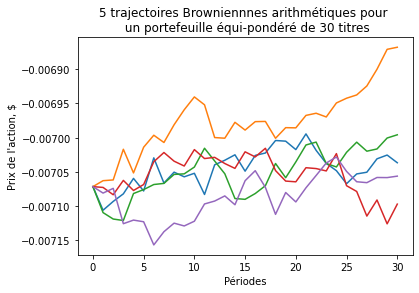

In [ ]:
#Simuler les rendements d’un portefeuille équi-pondéré (sauf ‘’DJI’’) sur 30 jours. Présentez 5 trajectoires. Pour vous simplifier la vie, vous pouvez choisir de simuler un portefeuille d e10 titres uniquement. 
#I.	Utilisez un mouvement brownien arithmétique
#a.	Simulez 30 rendements
#b.	Composez ces rendements pour trouver les prix des titres ou du portefeuille à chaque période.
#c.	Répétez pour chacune des trajectoires

def Brownian(seed, N):
    np.random.seed(seed)                         
    dt = 1./N                                    # time step
    b = np.random.normal(0., 1., int(N))*np.sqrt(dt)  # brownian increments
    W = np.cumsum(b)                             # brownian path
    return W, b

So = daily_df2_dow.loc['2019-12-30'].mean()
mu = daily_df2_dow_avg.mean()
sigma = daily_df2_dow_std.mean()

seed = [1,2,3,4,5]
N = 30
W1 = Brownian(seed[0], N)[0]
W2 = Brownian(seed[1], N)[0]
W3 = Brownian(seed[2], N)[0]
W4 = Brownian(seed[3], N)[0]
W5 = Brownian(seed[4], N)[0]
T = 1 # periode de 1

def GBM(So, mu, sigma, W, T, N):
    t = np.linspace(0., 1., N+1)
    S = []
    S.append(So)
    for i in range(1, int(N+1)):
        drift = (mu - 0.5 * sigma**2) * t[i]
        diffusion = sigma * W[i-1]
        S_temp = So*np.exp(drift + diffusion)
        S.append(S_temp)
    return S, t

soln1 = GBM(So, mu, sigma, W1, T, N)[0]
soln2 = GBM(So, mu, sigma, W2, T, N)[0]
soln3 = GBM(So, mu, sigma, W3, T, N)[0]
soln4 = GBM(So, mu, sigma, W4, T, N)[0]
soln5 = GBM(So, mu, sigma, W5, T, N)[0]
t = GBM(So, mu, sigma, W1, T, N)[1]

plt.plot(soln1)
plt.plot(soln2)
plt.plot(soln3)
plt.plot(soln4)
plt.plot(soln5)
plt.ylabel("Prix de l'action, $")
plt.xlabel("Périodes")
plt.title('5 trajectoires Browniennnes arithmétiques pour \n un portefeuille équi-pondéré de 30 titres')
plt.show()

Question 4 

In [ ]:
#Q4.1	Faites une réplication en utilisant un ‘’Ridge regression’’.Ajouter les contraintes suivantes :
#•	Somme de poids = 1
#•	Poids ≥ 0
#•	Max Poids = 20%

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

X=daily_df2_dow.loc['2010-02-16':]
Y=DJI.loc['2010-02-16':]

print("Valeurs nulles dans le dataframe X:", X.isnull().sum().sum()) # On vérifie que X et Y n'ont pas de valeur nulles
print("Valeurs nulles dans le dataframe Y:", Y.isnull().sum().sum())
dates = Y.index
lr = LinearRegression()
lr.fit(X, Y)
print(lr.coef_)

Valeurs nulles dans le dataframe X: 0
Valeurs nulles dans le dataframe Y: 0
[[0.02972048 0.02221321 0.07095785 0.04696492 0.0123584  0.04353509
  0.00706501 0.03609915 0.002742   0.0348714  0.04098575 0.06916907
  0.01761847 0.04905043 0.01911084 0.0272883  0.04646717 0.0581967
  0.02201174 0.03243193 0.01751556 0.01776982 0.03218254 0.03927206
  0.03557148 0.04465742 0.01878588 0.0276825  0.03070332 0.03795513]]


In [53]:
rr = Ridge(alpha=0.005) # on recherche des faibles alpha puisque : "the smaller the value of alpha, the higher would be the magnitude of the coefficients."
rr.fit(X, Y)


rr100 = Ridge(alpha=100)
rr100.fit(X,Y) #  comparaison avec le alpha 

Lin_resultat=lr.score(X, Y)

Ridge_resultat = rr.score(X,Y)

Ridge_resultat100 = rr100.score(X,Y)

print(Lin_resultat)
print (Ridge_resultat)
print(Ridge_resultat100)

prediction=rr.predict(X)

0.9865082533950358
0.9865025892730978
0.11124730284285511


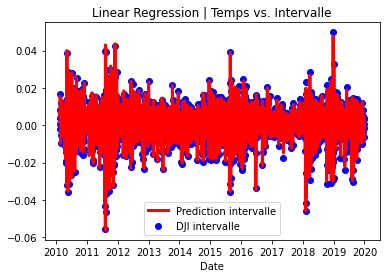

In [54]:

plt.scatter(dates_base, Y, color='blue', label= 'DJI intervalle') 
plt.plot(dates_base, prediction, color='red', linewidth=3, label = 'Prediction intervalle')
plt.title('Linear Regression | Temps vs. Intervalle')
plt.legend()
plt.xlabel('Date')
plt.show()